In [2]:
import numpy as np
import matplotlib.pyplot as plt

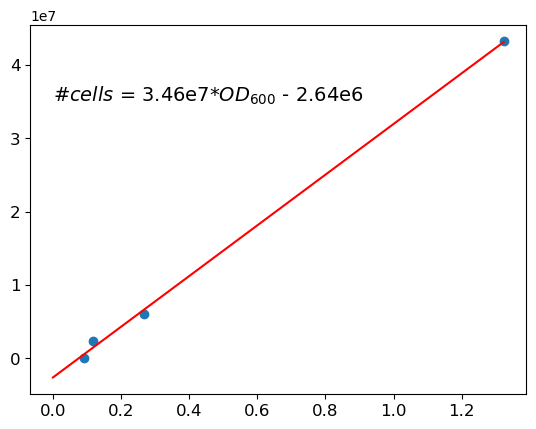

In [3]:
# # first try linear fit

# cells = np.array([432,60,(31+17)/2,0])*10**5
# od = np.array([np.mean([1.28,1.34,1.35]),
#                np.mean([0.24,0.29,0.27]),
#                np.mean([0.11,0.12,0.12]),
#                0.09])

# fig,ax = plt.subplots()

# ax.scatter(od,cells)

# res = np.polyfit(od,cells, deg=1) # deg = 1 -> linear fit

# x = np.linspace(0,np.max(od),100)
# y = res[1] + res[0]*x
# ax.plot(x,y,color='r')

# # get sci notation
# power = np.floor(np.log10(res[0]))
# leading = np.log10(res[0]) - power
# leading = np.round(10**leading,2)

# coeff1 = str(leading) + 'e' + str(int(power))

# power = np.floor(np.log10(-res[1]))
# leading = np.log10(-res[1]) - power
# leading = np.round(10**leading,2)

# coeff0 = str(leading) + 'e' + str(int(power))

# t = '$\# cells$ = ' + coeff1 + '$*OD_{600}$' + ' - ' + coeff0
# ax.annotate(t,(0,3.5*10**7),fontsize=14)


# ax.tick_params('both',labelsize=12)

# # fig.savefig('OD600_vs_cells.png',bbox_inches='tight',dpi=300)

# od_old = od

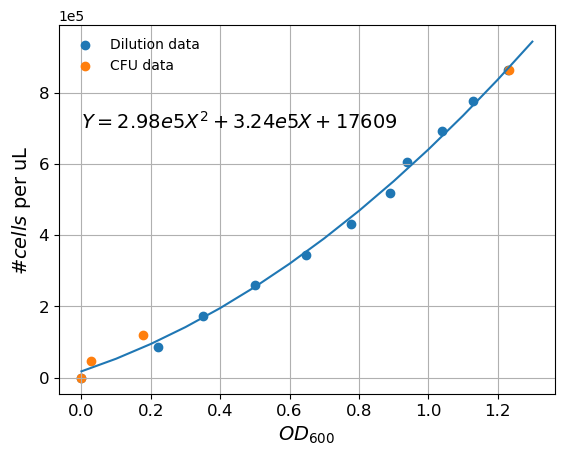

In [10]:
#%% More OD measurements and polynomial fit

cells = np.array([432,60,(31+17)/2,0])*(10**5)/50 # per uL
od_old = np.array([np.mean([1.28,1.34,1.35]),
               np.mean([0.24,0.29,0.27]),
               np.mean([0.11,0.12,0.12]),
               0.09])

proportion = np.array([1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0])
cell_num = proportion*432*(10**5)/50
od = np.array([1.32,1.22,1.13,1.03,0.98,0.866,0.738,0.589,0.44,0.31,0.09])

od = od - np.min(od)
od_old = od_old - np.min(od_old)

fig2,ax2 = plt.subplots()

ax2.scatter(od,cell_num,label='Dilution data')

ydata = np.concatenate((cell_num,cells)) # per uL
xdata = np.concatenate((od,od_old))

res = np.polyfit(xdata,ydata,deg=2) # 2nd degree polynomial fit
x = np.arange(0,max(od)+0.1,step=0.1) 
y = res[2] + res[1]*x + res[0]*x**2
ax2.plot(x,y)

ax2.scatter(od_old,cells,label='CFU data')

ax2.tick_params('both',labelsize=12)
ax2.set_xlabel('$OD_{600}$',fontsize=14)
ax2.set_ylabel('$\# cells$ per uL',fontsize=14)

t = '$Y = 2.98e5X^{2} + 3.24e5X + 17609$'
ax2.annotate(t,(0,0.7*10**6),fontsize=14)

ax2.legend(frameon=False)

ax2.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

plt.grid(True)
fig2.savefig('OD600_vs_cells.png',bbox_inches='tight',dpi=300)

# print(res)

In [11]:
print(res)
print(xdata)

[297761.03865714 324941.3815491   17609.09483884]
[1.23       1.13       1.04       0.94       0.89       0.776
 0.648      0.499      0.35       0.22       0.         1.23333333
 0.17666667 0.02666667 0.        ]
